In [1]:
# math & tables module
import numpy as np
import pandas as pd

# plotting module
from matplotlib import pyplot as plt
import seaborn as sns

# module to show version used in project
import session_info

# statistics module
from scipy import stats as st
import statsmodels.stats.proportion as sp

# pre-processing
from sklearn.preprocessing import RobustScaler, StandardScaler

In [2]:
# session module version
session_info.show()

In [3]:
# reading dataset
data = pd.read_csv("train.csv", sep=';')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Data Cleaning

### Handle Missing Values
from descriptive statistics shown that there are 4 column contain missing-values but not in form of null-values, however in form of value of 'unknown' & 'other' in 4 column named: *job, education, contact, poutcome*. ```poutcome``` are variable that having the most unknown value which consist of more than its 50% data, the best decision taken is to just take out and not use the variables..

#### Job Variable

In [5]:
# Handling missing values in job column using frequent values replacing method
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student,unknown
count,9732,9458,7597,5171,4154,2264,1579,1487,1303,1240,938,288


In [6]:
# replacing the unknown values using the most values containing column (mode) which 'blue-collar'
data.job.replace(to_replace='unknown', value=data.job.mode()[0], inplace=True)
data.job.value_counts().to_frame().T

job,blue-collar,management,technician,admin.,services,retired,self-employed,entrepreneur,unemployed,housemaid,student
count,10020,9458,7597,5171,4154,2264,1579,1487,1303,1240,938


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Education Variable

In [7]:
# Handling missing values in education column using frequent values replacing method
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary,unknown
count,23202,13301,6851,1857


In [8]:
data.education.replace(to_replace='unknown', value=data.education.mode()[0], inplace=True)
data.education.value_counts().to_frame().T

education,secondary,tertiary,primary
count,25059,13301,6851


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Contact Variable

In [9]:
# Handling missing values in contact column using frequent values replacing method
data.contact.value_counts().to_frame().T

contact,cellular,unknown,telephone
count,29285,13020,2906


In [10]:
data.contact.replace(to_replace='unknown', value=data.contact.mode()[0], inplace=True)
data.contact.value_counts().to_frame().T

contact,cellular,telephone
count,42305,2906


After replacing with the mode value, the unknown which is the missing value have gone from the column

#### Poutcome Variable

In [11]:
# handling the coloumn value named 'other' and change it to its mode value
data.poutcome.value_counts().to_frame().T

poutcome,unknown,failure,other,success
count,36959,4901,1840,1511


In [12]:
# droping the column
data.drop(['poutcome'], axis=1, inplace=True)
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'y'],
      dtype='object')

Dengan pengecekan diatas didapatkan bahwa variabel ```poutcome``` telah dihapus

### Handle Duplicated Data
from the previous stage, shown that there are no duplication in dataset analyse from all column, so in this section there are no treatment needed to be done

In [13]:
# checking overall
data.duplicated().sum()

0

There are no duplication shown from the dataset analyse from all the column

In [14]:
# checking for subset
data.duplicated(subset=['age','balance','day','campaign']).sum()

1332

### Handle Outliers
from previous stage, known there are 6 numerical variables having outliers

In [15]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [16]:
# numerical setelah feature selection
numerical = ['age','balance','day','duration','campaign']

In [17]:
data_used = data
data_num = data_used[numerical]
data_num.head()

,age,balance,day,duration,campaign
0,58,2143,5,261,1
1,44,29,5,151,1
2,33,2,5,76,1
3,47,1506,5,92,1
4,33,1,5,198,1


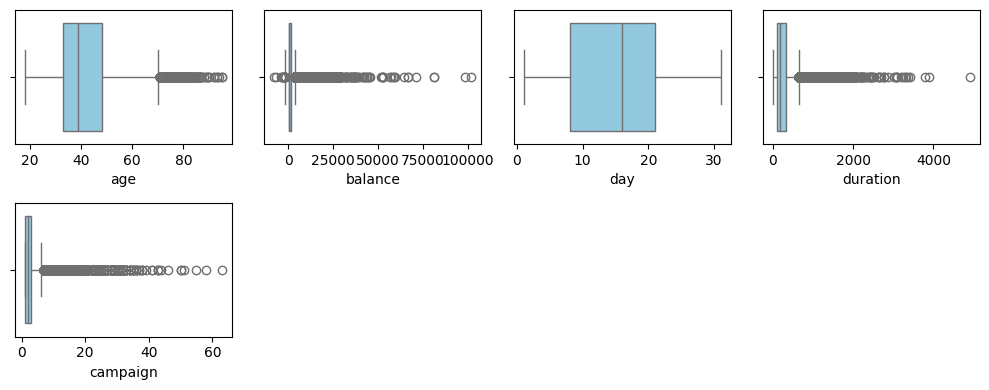

In [18]:
feature = numerical

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=data[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

In [19]:
output_normal = pd.DataFrame({})
def iqr_treshold(variable):
    Q1 = data_num[variable].quantile(.25)
    Q3 = data_num[variable].quantile(.75)

    IQR = Q3-Q1

    min_tresh = Q1 - (1.5*IQR)
    max_tresh = Q1 + (1.5*IQR)
    
    return min_tresh, max_tresh

In [20]:
def iqr_normalize(variable):
    threshold = ((data_num[variable] >= iqr_treshold(variable)[0]) & 
                (data_num[variable] <= iqr_treshold(variable)[1]))
    data_num.loc[:,['normal_label']] = threshold
    kolom = data_num.query("normal_label == True")[variable]
    return kolom

In [21]:
output_normal['age'] = iqr_normalize("age")
output_normal['campaign'] = iqr_normalize("campaign")
output_normal['balance']  = iqr_normalize("balance")
output_normal['duration'] = iqr_normalize("duration")
output_normal['day'] = data_num.loc[:,['day']]

In [22]:
output_normal.head()

,age,campaign,balance,duration,day
1,44,1.0,29.0,151.0,5
2,33,1.0,2.0,76.0,5
3,47,1.0,1506.0,92.0,5
4,33,1.0,1.0,198.0,5
5,35,1.0,231.0,139.0,5


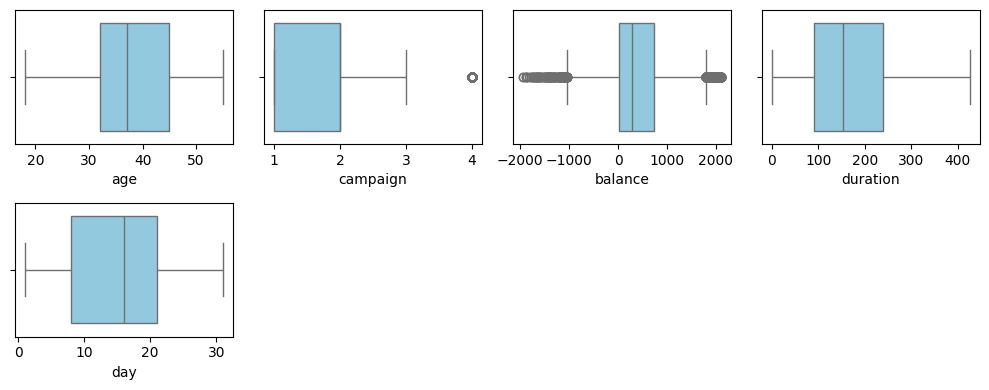

In [23]:
feature = ['age','campaign','balance','duration','day']

plt.figure(figsize=(10,4))
for i in range(0, len(feature)):
    plt.subplot(2,4, i+1)
    sns.boxplot(x=output_normal[feature[i]], color='skyblue')
    plt.xlabel(feature[i])
    plt.tight_layout()

In [24]:
output_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40311 entries, 1 to 45210
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       40311 non-null  int64  
 1   campaign  34818 non-null  float64
 2   balance   33528 non-null  float64
 3   duration  34094 non-null  float64
 4   day       40311 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB


In [25]:
output_normal.isna().sum()

age            0
campaign    5493
balance     6783
duration    6217
day            0
dtype: int64

## Feature Engineering

### Feature Encoding

In [26]:
data_used.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,cellular,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,cellular,5,may,198,1,-1,0,no


In [27]:
# after feature selection
category = ['job','marital','education','default','housing','loan','contact','month','y']
cat_ordinal = ['education','default','housing','loan','month','y']
cat_nominal = ['job','contact', 'marital']

In [28]:
data_used.contact.value_counts()

contact
cellular     42305
telephone     2906
Name: count, dtype: int64

In [29]:
mapping_month = {
    'jan' : 0,
    'feb' : 1,
    'mar' : 2,
    'apr' : 3,
    'may' : 4,
    'jun' : 5,
    'jul' : 6,
    'aug' : 7,
    'sep' : 8,
    'oct' : 9,
    'nov' : 10,
    'dec' : 11
}

data_used['month'] = data_used['month'].map(mapping_month)

In [30]:
mapping_education = {
    'primary'   : 0,
    'secondary' : 1, 
    'tertiary'  :2
}

data_used['education'] = data_used['education'].map(mapping_education)

In [31]:
mapping_default = {
    'yes' : 1,
    'no'  : 0
}

data_used['default'] = data_used['default'].map(mapping_default)

In [32]:
mapping_housing = {
    'yes' : 1,
    'no'  : 0
}

data_used['housing'] = data_used['housing'].map(mapping_housing)

In [33]:
mapping_loan = {
    'yes' : 1,
    'no'  : 0
}

data_used['loan'] = data_used['loan'].map(mapping_loan)

In [34]:
mapping_y = {
    'yes' : 1,
    'no'  : 0
}

data_used['y'] = data_used['y'].map(mapping_y)

In [45]:
data_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  int64 
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  int64 
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  y          45211 non-null  int64 
dtypes: int64(13), object(3)
memory usage: 5.5+ MB


In [35]:
output_normal['month'] = data_used.loc[:,['month']]
output_normal['education'] = data_used.loc[:,['education']]
output_normal['default'] = data_used.loc[:,['default']]
output_normal['housing'] = data_used.loc[:,['housing']]
output_normal['loan'] = data_used.loc[:,['loan']]
output_normal['y'] = data_used.loc[:,['y']]

In [46]:
output_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 1 to 45209
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                40311 non-null  float64
 1   campaign           34818 non-null  float64
 2   balance            33528 non-null  float64
 3   duration           34094 non-null  float64
 4   day                40311 non-null  float64
 5   month              40311 non-null  float64
 6   education          40311 non-null  float64
 7   default            40311 non-null  float64
 8   housing            40311 non-null  float64
 9   loan               40311 non-null  float64
 10  y                  40311 non-null  float64
 11  contact_cellular   45211 non-null  bool   
 12  contact_telephone  45211 non-null  bool   
dtypes: bool(2), float64(11)
memory usage: 4.2 MB


In [37]:
contact_ohe = pd.get_dummies(data_used['contact'], prefix='contact')
contact_ohe

,contact_cellular,contact_telephone
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
45206,True,False
45207,True,False
45208,True,False
45209,False,True


In [38]:
output_normal = pd.concat([output_normal,contact_ohe], axis=1)

In [39]:
output_normal.head()

,age,campaign,balance,duration,day,month,education,default,housing,loan,y,contact_cellular,contact_telephone
1,44.0,1.0,29.0,151.0,5.0,4.0,1.0,0.0,1.0,0.0,0.0,True,False
2,33.0,1.0,2.0,76.0,5.0,4.0,1.0,0.0,1.0,1.0,0.0,True,False
3,47.0,1.0,1506.0,92.0,5.0,4.0,1.0,0.0,1.0,0.0,0.0,True,False
4,33.0,1.0,1.0,198.0,5.0,4.0,1.0,0.0,0.0,0.0,0.0,True,False
5,35.0,1.0,231.0,139.0,5.0,4.0,2.0,0.0,1.0,0.0,0.0,True,False


In [40]:
output_normal.isna().sum()

age                   4900
campaign             10393
balance              11683
duration             11117
day                   4900
month                 4900
education             4900
default               4900
housing               4900
loan                  4900
y                     4900
contact_cellular         0
contact_telephone        0
dtype: int64

### Feature Transformation 

In [41]:
output_normal.loc[:,['age']] = StandardScaler().fit_transform(output_normal['age'].values.reshape(len(output_normal),1))
output_normal.loc[:,['campaign']] = StandardScaler().fit_transform(output_normal['campaign'].values.reshape(len(output_normal),1))
output_normal.loc[:,['balance']] = StandardScaler().fit_transform(output_normal['balance'].values.reshape(len(output_normal),1))
output_normal.loc[:,['duration']] = StandardScaler().fit_transform(output_normal['duration'].values.reshape(len(output_normal),1))
output_normal.loc[:,['day']] = StandardScaler().fit_transform(output_normal['age'].values.reshape(len(output_normal),1))

In [42]:
output_normal.head()

,age,campaign,balance,duration,day,month,education,default,housing,loan,y,contact_cellular,contact_telephone
1,0.661874,-0.905714,-0.714990,-0.198504,0.661874,4.0,1.0,0.0,1.0,0.0,0.0,True,False
2,-0.669147,-0.905714,-0.761848,-0.933178,-0.669147,4.0,1.0,0.0,1.0,1.0,0.0,True,False
3,1.024880,-0.905714,1.848317,-0.776447,1.024880,4.0,1.0,0.0,1.0,0.0,0.0,True,False
4,-0.669147,-0.905714,-0.763583,0.261891,-0.669147,4.0,1.0,0.0,0.0,0.0,0.0,True,False
5,-0.427143,-0.905714,-0.364423,-0.316052,-0.427143,4.0,2.0,0.0,1.0,0.0,0.0,True,False
